In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [15]:
# Reading the data
data = pd.read_csv(r"C:\Users\vaish\Downloads\SMS Spam Detection\spam.csv", encoding='latin-1')
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
data = data.rename(columns={'v1': 'label', 'v2': 'text'})
data['label_enc'] = data['label'].map({'ham': 0, 'spam': 1})

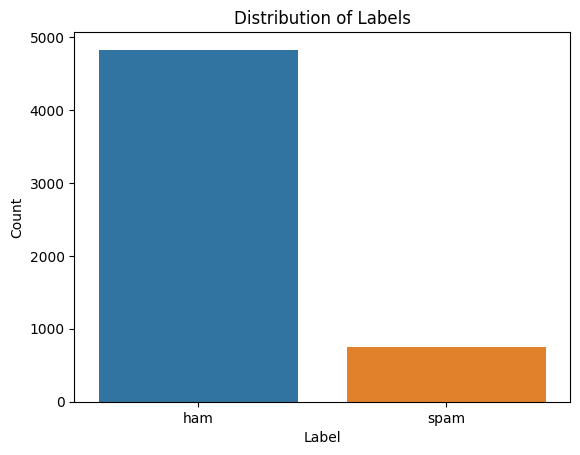

In [16]:
# Visualizing label distribution
sns.countplot(x=data['label'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.show()

In [17]:
# Average number of tokens in all sentences
avg_words_len = round(sum([len(text.split()) for text in data['text']]) / len(data['text']))
print("Average number of words per sentence:", avg_words_len)

Average number of words per sentence: 15


In [18]:
# Total number of unique words in corpus
unique_words = set()
for text in data['text']:
    for word in text.split():
        unique_words.add(word)
total_words_length = len(unique_words)
print("Total number of unique words in corpus:", total_words_length)

Total number of unique words in corpus: 15585


In [19]:
# Splitting data into training and testing sets
X, y = np.asarray(data['text']), np.asarray(data['label_enc'])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (4457,) (4457,)
Testing set shape: (1115,) (1115,)


In [20]:
# Creating TF-IDF vectors
tv = TfidfVectorizer().fit(X_train)
X_train_tv, X_test_tv = tv.transform(X_train), tv.transform(X_test)

In [21]:
# Training a baseline model (Naive Bayes)
model = MultinomialNB()
model.fit(X_train_tv, y_train)

MultinomialNB()

In [22]:
# Evaluating the baseline model
accuracy = accuracy_score(y_test, model.predict(X_test_tv))
print("Accuracy of the model:", accuracy)
print(classification_report(y_test, model.predict(X_test_tv)))


Accuracy of the model: 0.9623318385650225
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



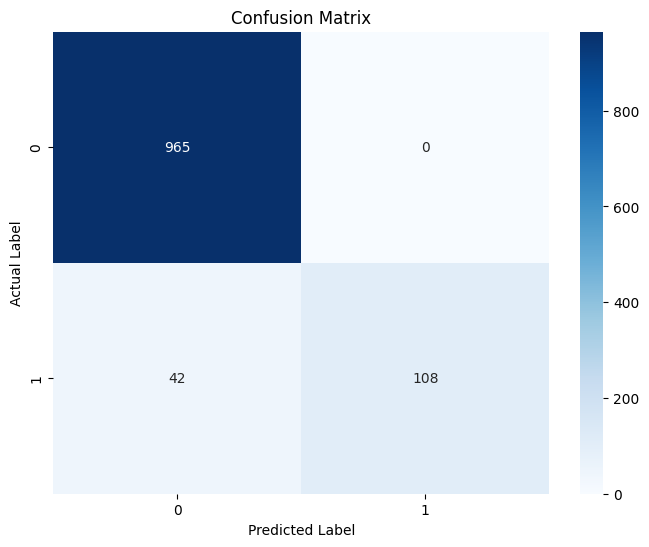

In [23]:
# Plotting the confusion matrix
y_pred = model.predict(X_test_tv)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()